In [115]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from PIL import Image



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


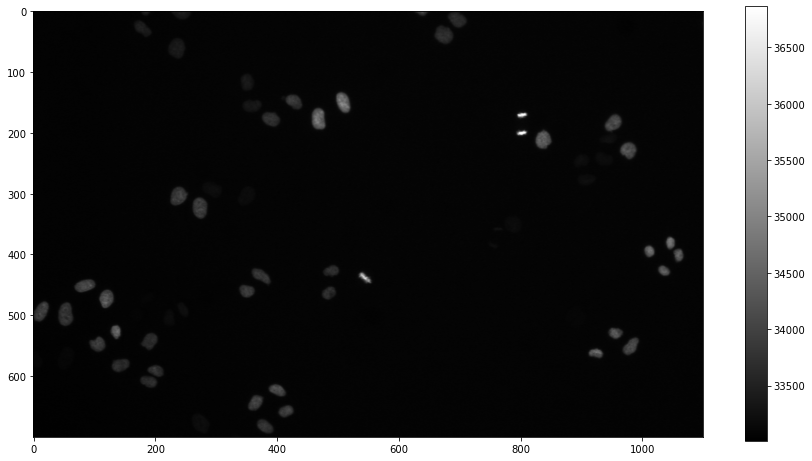

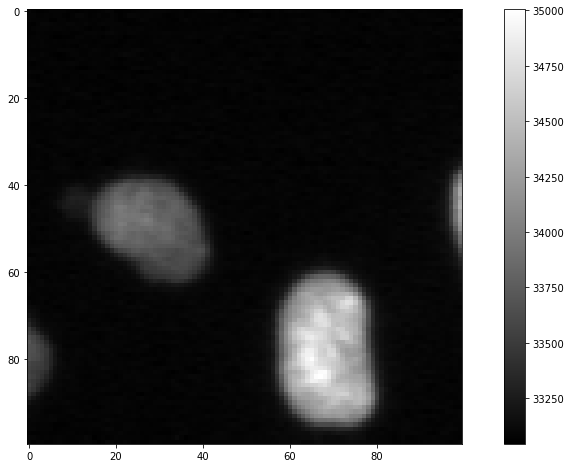

In [116]:
image = sk.imread("../Data/N2DL-HeLa/img/t13.tif")
ip.show_image(image, 15, 8)
image_small = image[100:200, 400:500]
ip.show_image(image_small, 15, 8)

ground_truth = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")
ground_truth_small = ground_truth[100:200, 400:500]

5000


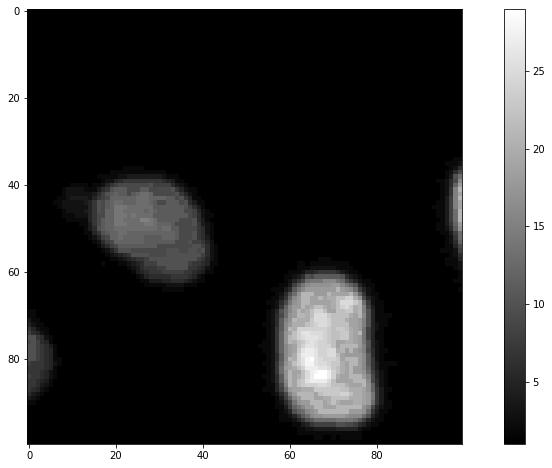

In [117]:
image_urg = urg.unseeded_region_growing_algorithm(image_small, (0, 0), 50)
ip.show_image(image_urg, 15, 8)

29
21
0.9381203308627277


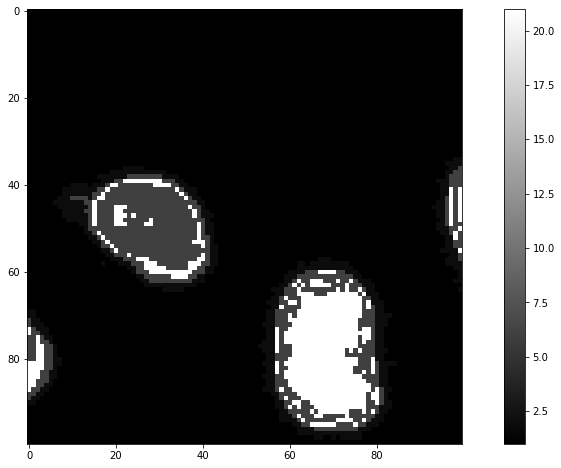

In [118]:
test3 = rm.region_merging(image_urg.copy(), image, 0.00001, 500)
ip.show_image(test3, 15, 8)

score_merging = ds.evaluate_accuracy_weighted(test3, ground_truth_small)
print(score_merging)

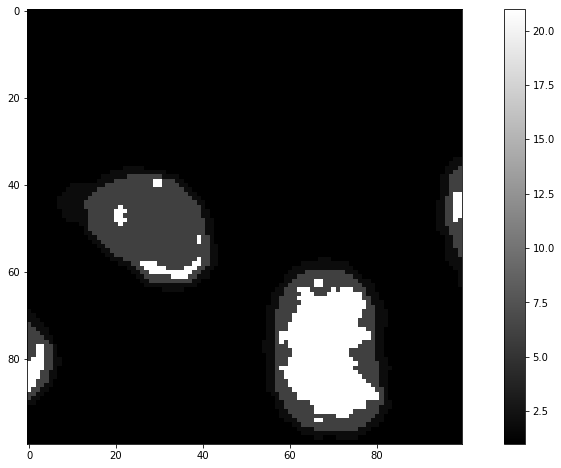

In [119]:
test4 = ip.median_filter(test3, 3)
ip.show_image(test4, 15, 8)

0.9404875741570704
0.9653


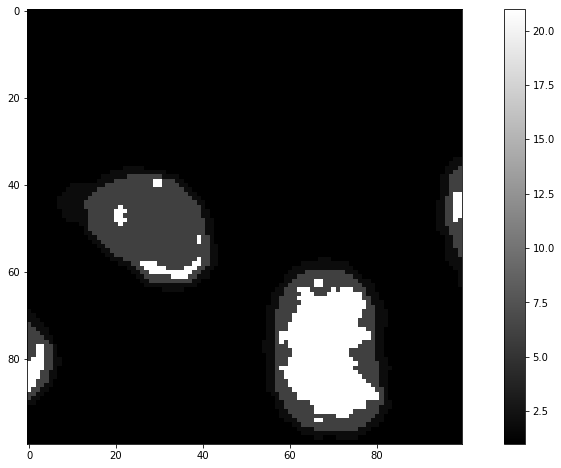

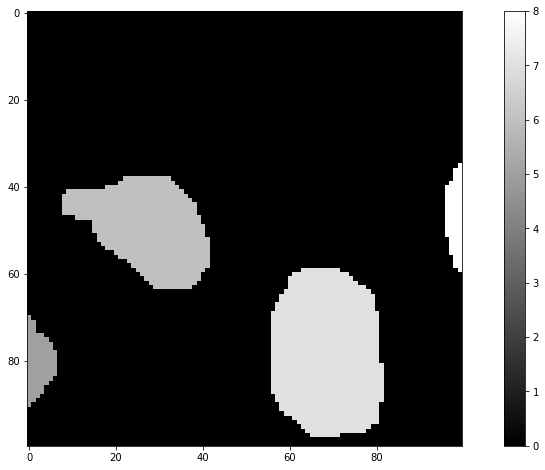

In [120]:
score = ds.evaluate_accuracy_weighted(test4, ground_truth_small)
print(score)
score2 = ds.evaluate_accuracy_unweighted(test4, ground_truth_small)
print(score2)
ip.show_image(test4, 15, 8)
ip.show_image(ground_truth_small, 15, 8)